In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, Sequential


In [2]:
# 确定数据集的根目录
dataset_root = 'C:\\Users\\HASEE\\Desktop\\Semaster4\\PJ\\final-project\\Dataset\\project-garbage_classification'

# 创建一个空的DataFrame
data = pd.DataFrame(columns=['Filepath', 'Category'])


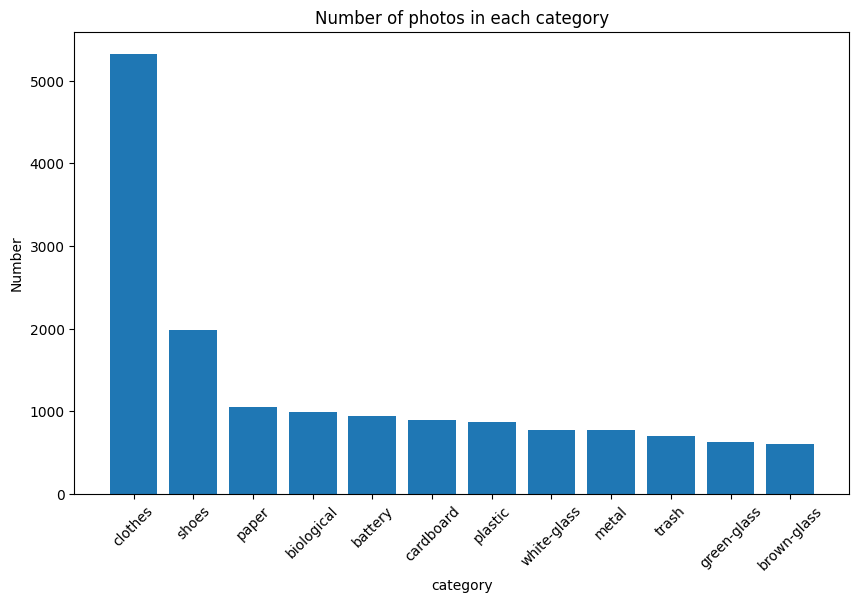

In [3]:
# 遍历数据集的文件夹结构，将文件路径和对应的类别添加到DataFrame中
for category in os.listdir(dataset_root):
    category_path = os.path.join(dataset_root, category)
    if os.path.isdir(category_path):
        for subcategory in os.listdir(category_path):
            subcategory_path = os.path.join(category_path, subcategory)
            if os.path.isdir(subcategory_path):
                for filename in os.listdir(subcategory_path):
                    file_path = os.path.join(subcategory_path, filename)
                    data = data.append({'Filepath': file_path, 'Category': subcategory}, ignore_index=True)
category_counts = data['Category'].value_counts()

# 创建柱状图来可视化照片数量
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('category')
plt.ylabel('Number')
plt.title('Number of photos in each category')
plt.xticks(rotation=45)  # 旋转横坐标标签以避免重叠
plt.show()

In [4]:
# 定义图像的大小、批量大小和训练数据的比例
image_size = (224, 224)
batch_size = 32
train_split = 0.8

# 创建ImageDataGenerator对象，用于数据增强和图像预处理
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=1 - train_split,  # 划分验证集的比例
    rotation_range=20,  # 旋转角度范围
    width_shift_range=0.2,  # 水平平移范围
    height_shift_range=0.2,  # 垂直平移范围
    shear_range=0.2,  # 剪切强度
    zoom_range=0.2,  # 缩放范围
    horizontal_flip=True,  # 水平翻转
    fill_mode='nearest'  # 填充模式
)


In [5]:
# 使用train_test_split函数将数据划分为训练集和验证集
train_data, validation_data = train_test_split(data, train_size=train_split, stratify=data['Category'])

In [6]:
# 使用ImageDataGenerator对象从文件路径中加载和预处理图像数据
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='Filepath',
    y_col='Category',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=validation_data,
    x_col='Filepath',
    y_col='Category',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 9930 validated image filenames belonging to 12 classes.
Found 620 validated image filenames belonging to 12 classes.


In [7]:
# 定义深度学习模型
input_shape = (224, 224, 3)  # 输入图像的形状
num_classes = len(data['Category'].unique())  # 类别数量

model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])

In [8]:
# 编译模型
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
print(train_generator[0][0].shape)

(32, 224, 224, 3)


In [10]:
# 训练模型
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
311/311 [==============================] - 97s 301ms/step - loss: 1.7911 - accuracy: 0.4321 - val_loss: 1.6403 - val_accuracy: 0.4919
Epoch 2/10
311/311 [==============================] - 90s 289ms/step - loss: 1.4953 - accuracy: 0.5278 - val_loss: 1.5321 - val_accuracy: 0.5032
Epoch 3/10
311/311 [==============================] - 92s 296ms/step - loss: 1.4376 - accuracy: 0.5371 - val_loss: 1.3959 - val_accuracy: 0.5323
Epoch 4/10
311/311 [==============================] - 91s 291ms/step - loss: 1.3733 - accuracy: 0.5567 - val_loss: 1.3497 - val_accuracy: 0.5726
Epoch 5/10
311/311 [==============================] - 91s 291ms/step - loss: 1.3259 - accuracy: 0.5712 - val_loss: 1.3596 - val_accuracy: 0.5484
Epoch 6/10
311/311 [==============================] - 91s 293ms/step - loss: 1.3057 - accuracy: 0.5776 - val_loss: 1.3372 - val_accuracy: 0.5839
Epoch 7/10
311/311 [==============================] - 93s 297ms/step - loss: 1.2787 - accuracy: 0.5830 - val_loss: 1.3328 - val_ac

In [11]:
# 评估模型性能
test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='Filepath',
    y_col='Category',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

NameError: name 'test_data' is not defined

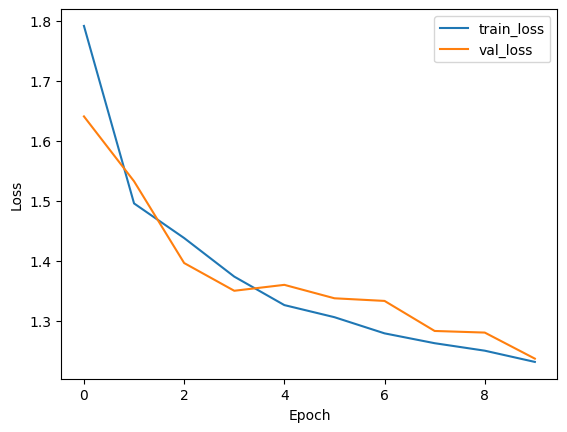

In [12]:
# 可视化训练历史
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()